In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif']=['Simhei'] 
plt.rcParams['axes.unicode_minus']=False

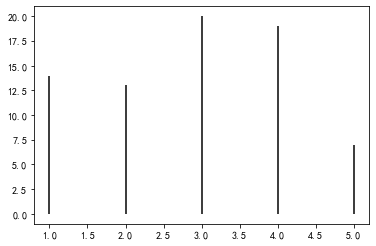

In [4]:
x=[1,2,3,4,5]
y=[14,13,20,19,7]
plt.vlines(x=x,ymin=0,ymax=y);

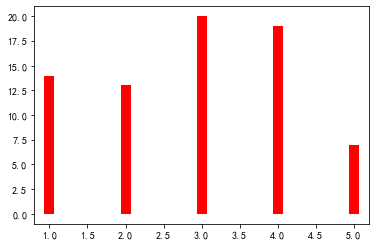

In [8]:
plt.vlines(x=x,ymin=0,ymax=y
          ,linewidth=10
          ,colors='red'
          ,linestyles='solid');

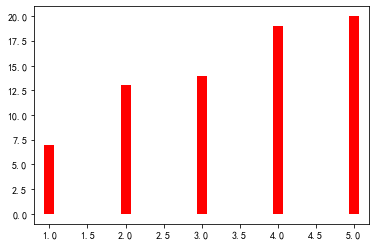

In [9]:
y.sort()
plt.vlines(x=x,ymin=0,ymax=y
          ,linewidth=10
          ,colors='red'
          ,linestyles='solid');

In [50]:
#导入数据
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df_raw.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [51]:
name = ["汽车制造商","型号名称","发动机排量(L)","制造年份","气缸数量","手动/自动"
              ,"驱动类型","城市里程/加仑","公路里程/加仑","汽油种类","车辆种类"]

In [52]:
#提取出我们需要的数据：使用groupby聚合每个品牌的车辆，求每个品牌下的城市里程/加仑的均值
#groupby就是数据透视表
df = df_raw[["cty","manufacturer"]]
df.head()

,cty,manufacturer
0,18,audi
1,21,audi
2,20,audi
3,21,audi
4,16,audi


In [58]:
df=df.groupby("manufacturer").mean() 
df

,cty
manufacturer,
audi,17.611111
chevrolet,15.000000
dodge,13.135135
ford,14.000000
honda,24.444444
hyundai,18.642857
jeep,13.500000
land rover,11.500000
lincoln,11.333333


In [59]:
df.sort_values('cty',inplace=True)
df.head()

,cty
manufacturer,
lincoln,11.333333
land rover,11.500000
dodge,13.135135
mercury,13.250000
jeep,13.500000


In [60]:
df.reset_index(inplace=True)
df

,manufacturer,cty
0,lincoln,11.333333
1,land rover,11.500000
2,dodge,13.135135
3,mercury,13.250000
4,jeep,13.500000
5,ford,14.000000
6,chevrolet,15.000000
7,pontiac,17.000000
8,audi,17.611111
9,nissan,18.076923


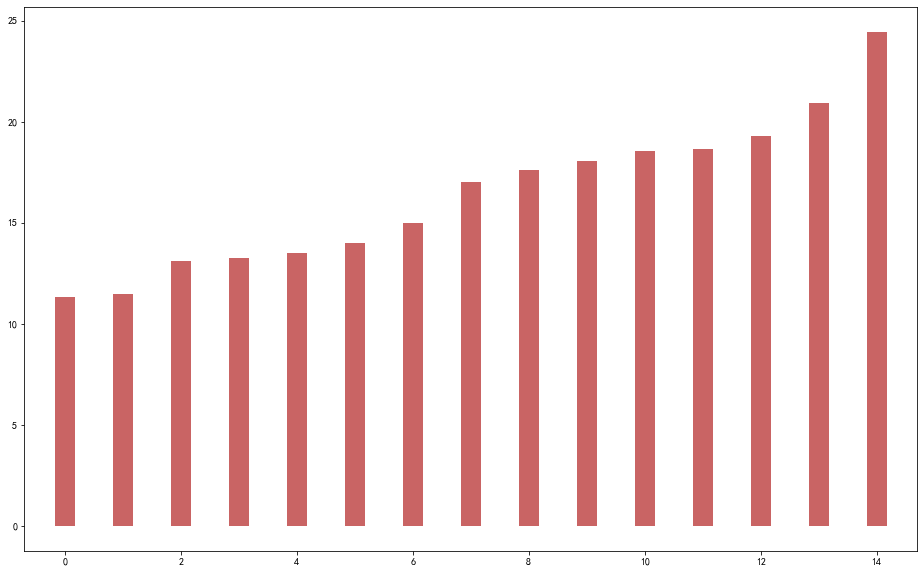

In [61]:
plt.figure(figsize=(16,10))
plt.vlines(x=df.index,ymin=0,ymax=df.cty
          ,color='firebrick'
          ,alpha=0.7
          ,linewidth=20)

画布和子图

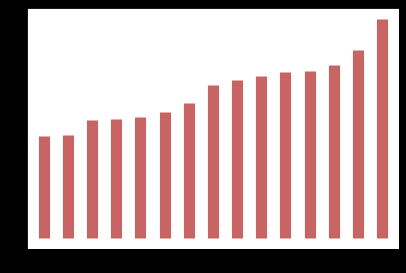

In [65]:
fig, ax = plt.subplots(figsize=(6,4)
                       #,facecolor="white"
                       , facecolor='black' #画布的填充色
                       , dpi = 80
                      )

ax.vlines(x=df.index, ymin=0, ymax=df.cty
          , color='firebrick', alpha=0.7, linewidth=10);

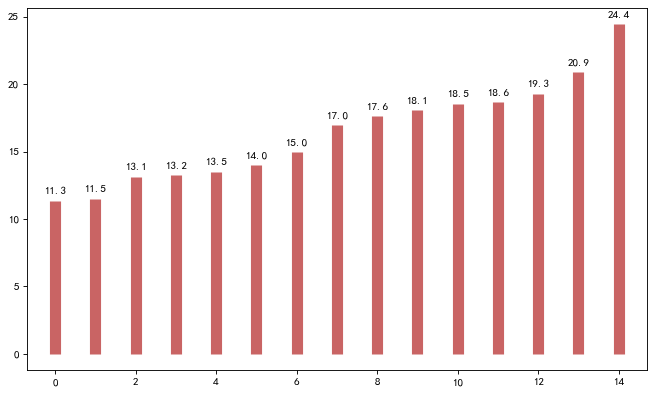

In [67]:
fig,ax=plt.subplots(figsize=(10,6)
                   ,facecolor='white'
                   ,dpi=80)

ax.vlines(x=df.index,ymin=0,ymax=df.cty
         ,color='firebrick'
         ,alpha=0.7
         ,linewidth=10);

#使用text添加注解，一次只能加一个，需要循环

for i,cty in enumerate(df.cty):
    ax.text(i,cty+0.5#注释所在坐标
           ,round(cty,1)
           ,horizontalalignment='center')

In [68]:
[*enumerate(df.cty)]

[(0, 11.333333333333334),
 (1, 11.5),
 (2, 13.135135135135135),
 (3, 13.25),
 (4, 13.5),
 (5, 14.0),
 (6, 15.0),
 (7, 17.0),
 (8, 17.61111111111111),
 (9, 18.076923076923077),
 (10, 18.529411764705884),
 (11, 18.642857142857142),
 (12, 19.285714285714285),
 (13, 20.925925925925927),
 (14, 24.444444444444443)]

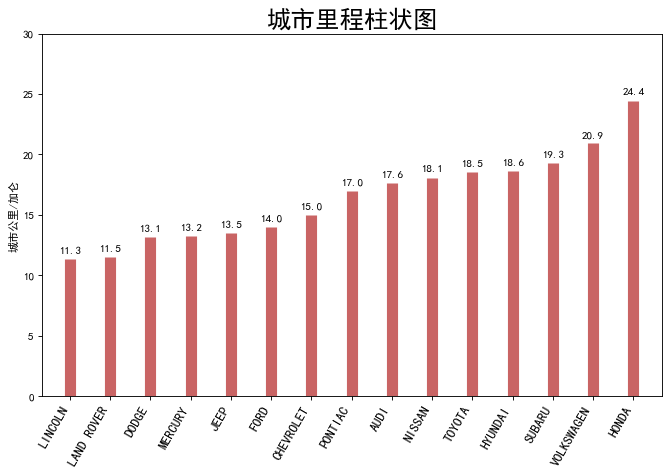

In [69]:
fig,ax=plt.subplots(figsize=(10,6)
                   ,facecolor='white'
                   ,dpi=80)

ax.vlines(x=df.index,ymin=0,ymax=df.cty
         ,color='firebrick'
         ,alpha=0.7
         ,linewidth=10);

#使用text添加注解，一次只能加一个，需要循环

for i,cty in enumerate(df.cty):
    ax.text(i,cty+0.5#注释所在坐标
           ,round(cty,1)
           ,horizontalalignment='center')

#=======================================

ax.set_title('城市里程柱状图', fontdict={'size':22})
ax.set(ylabel='城市公里/加仑', ylim=(0, 30))   

plt.xticks(df.index #显示在横坐标上的位置,不是替换了index，而是放在了index的位置上
           , df.manufacturer.str.upper() #要显示的标尺的内容 .str变成字符串，.upper变成大写
           , rotation=60 #是否进行旋转
           , horizontalalignment='right'#这里是调整文字的位置，x在其右边
           , fontsize=12);